In [2]:
import os
import sys
import time
import calendar
import datetime

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import scipy as sp
from scipy import stats
import tensorflow as tf

# from my_lib.field_config import data_encoder

# Setup

In [3]:
bf_ds_file = "generated_data/bf.csv"
dg_file = "generated_data/dg.csv"
tg_file = "generated_data/tg.csv"


bf_df = pd.read_csv(bf_ds_file, parse_dates=["date"])
bf_df["datetime"] = bf_df["date"]
bf_df

,Unnamed: 0,amount,k_symbol_num,operation_num,type_num,date_fields,days_passed,age,date,account_id,k_symbol,operation,type,tcode,datetime,raw_amount,raw_tcode
0,0,4716.28,0,0,0,01/31,0,47,1993-12-08,0,NaN,CREDIT IN CASH,CREDIT,nan__CREDIT IN CASH__CREDIT,1993-12-08,4716.28,nan__CREDIT IN CASH__CREDIT
1,1,7273.42,0,0,0,01/31,4,47,1993-12-12,0,NaN,CREDIT IN CASH,CREDIT,nan__CREDIT IN CASH__CREDIT,1993-12-12,7273.42,nan__CREDIT IN CASH__CREDIT
2,2,92.78,1,2,0,01/01,19,47,1993-12-31,0,INTEREST CREDITED,NaN,CREDIT,INTEREST CREDITED__nan__CREDIT,1993-12-31,92.78,INTEREST CREDITED__nan__CREDIT
3,3,7178.21,0,0,0,01/31,8,47,1994-01-08,0,NaN,CREDIT IN CASH,CREDIT,nan__CREDIT IN CASH__CREDIT,1994-01-08,7178.21,nan__CREDIT IN CASH__CREDIT
4,4,8915.65,0,0,0,01/31,3,47,1994-01-11,0,NaN,CREDIT IN CASH,CREDIT,nan__CREDIT IN CASH__CREDIT,1994-01-11,8915.65,nan__CREDIT IN CASH__CREDIT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,499975,5164.42,0,3,1,01/31,10,31,1998-11-15,4999,NaN,CASH WITHDRAWAL,DEBIT,nan__CASH WITHDRAWAL__DEBIT,1998-11-15,-5164.42,nan__CASH WITHDRAWAL__DEBIT
399996,499976,15233.14,0,0,0,01/31,3,31,1998-11-18,4999,NaN,CREDIT IN CASH,CREDIT,nan__CREDIT IN CASH__CREDIT,1998-11-18,15233.14,nan__CREDIT IN CASH__CREDIT
399997,499977,7378.34,0,3,1,01/01,7,31,1998-11-25,4999,NaN,CASH WITHDRAWAL,DEBIT,nan__CASH WITHDRAWAL__DEBIT,1998-11-25,-7378.34,nan__CASH WITHDRAWAL__DEBIT
399998,499978,5054.12,0,3,1,01/01,1,31,1998-11-26,4999,NaN,CASH WITHDRAWAL,DEBIT,nan__CASH WITHDRAWAL__DEBIT,1998-11-26,-5054.12,nan__CASH WITHDRAWAL__DEBIT


In [4]:
real_df = pd.read_csv(f"real_data/final_df--czech.csv", parse_dates=["datetime"])
real_df["days_passed"] = real_df["td"]
real_df

,Unnamed: 0,Unnamed: 0.1,column_a,account_id,date,type,operation,amount,balance,k_symbol,...,datetime,month,day,dow,year,td,dtme,doy,raw_amount,days_passed
0,0,0,149432,1,950324,CREDIT,CREDIT IN CASH,1000.0,1000.0,NaN,...,1995-03-24,3,24,4,1995,0.0,7,83,1000.0,0.0
1,1,1,157404,1,950413,CREDIT,COLLECTION FROM ANOTHER BANK,3679.0,4679.0,NaN,...,1995-04-13,4,13,3,1995,20.0,17,103,3679.0,20.0
2,2,2,158832,1,950423,CREDIT,CREDIT IN CASH,12600.0,17279.0,NaN,...,1995-04-23,4,23,6,1995,10.0,7,113,12600.0,10.0
3,3,3,162681,1,950430,CREDIT,NaN,19.2,17298.2,INTEREST CREDITED,...,1995-04-30,4,30,6,1995,7.0,0,120,19.2,7.0
4,4,4,167083,1,950513,CREDIT,COLLECTION FROM ANOTHER BANK,3679.0,20977.2,NaN,...,1995-05-13,5,13,5,1995,13.0,18,133,3679.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1056315,1056315,1056315,1033141,11382,981202,DEBIT,CASH WITHDRAWAL,25600.0,41114.4,NaN,...,1998-12-02,12,2,2,1998,2.0,29,336,-25600.0,2.0
1056316,1056316,1056316,1040574,11382,981210,CREDIT,COLLECTION FROM ANOTHER BANK,46248.0,87362.4,NaN,...,1998-12-10,12,10,3,1998,8.0,21,344,46248.0,8.0
1056317,1056317,1056317,1050362,11382,981225,DEBIT,CASH WITHDRAWAL,6300.0,81062.4,NaN,...,1998-12-25,12,25,4,1998,15.0,6,359,-6300.0,15.0
1056318,1056318,1056318,1053037,11382,981231,CREDIT,NaN,311.3,81373.6,INTEREST CREDITED,...,1998-12-31,12,31,3,1998,6.0,0,365,311.3,6.0


In [5]:

dg_df = pd.read_csv(dg_file, parse_dates=["datetime"])
dg_df["tcode"] = dg_df.tcode.apply(lambda x: x.replace("---", "--"))
dg_df.tcode.unique()

array(['nan__CREDIT IN CASH__CREDIT', 'nan__CASH WITHDRAWAL__DEBIT',
       'INTEREST CREDITED__nan__CREDIT',
       'HOUSEHOLD__REMITTANCE TO ANOTHER BANK__DEBIT',
       'OLD AGE PENSION__COLLECTION FROM ANOTHER BANK__CREDIT',
       'PAYMENT ON STATEMENT__CASH WITHDRAWAL__DEBIT',
       ' __REMITTANCE TO ANOTHER BANK__DEBIT',
       'INSURANCE PAYMENT__REMITTANCE TO ANOTHER BANK__DEBIT',
       'nan__CREDIT CARD WITHDRAWAL__DEBIT',
       'nan__COLLECTION FROM ANOTHER BANK__CREDIT',
       'LOAN PAYMENT__REMITTANCE TO ANOTHER BANK__DEBIT',
       'nan__REMITTANCE TO ANOTHER BANK__DEBIT',
       'HOUSEHOLD__CASH WITHDRAWAL__DEBIT',
       'SANCTION INTEREST__CASH WITHDRAWAL__DEBIT',
       'INSURANCE PAYMENT__CASH WITHDRAWAL__DEBIT',
       ' __CASH WITHDRAWAL__DEBIT'], dtype=object)

In [9]:

tg_df = pd.read_csv(tg_file, parse_dates=['datetime'])
tg_df["days_passed"] = tg_df["td"]
tg_df

,k_symbol_num,operation_num,type_num,td,amount,age,account_id,datetime,k_symbol,operation,type,tcode,raw_amount,days_passed
0,0,2,0,4.0,104.25,44.0,0,1996-04-17,NaN,NaN,CREDIT,nan__nan__CREDIT,104.25,4.0
1,0,3,1,18.0,288.76,44.0,0,1996-05-05,NaN,CASH WITHDRAWAL,DEBIT,nan__CASH WITHDRAWAL__DEBIT,-288.76,18.0
2,1,2,0,4.0,81.29,44.0,0,1996-05-09,INTEREST CREDITED,NaN,CREDIT,INTEREST CREDITED__nan__CREDIT,81.29,4.0
3,0,0,0,9.0,14286.56,44.0,0,1996-05-18,NaN,CREDIT IN CASH,CREDIT,nan__CREDIT IN CASH__CREDIT,14286.56,9.0
4,0,4,1,-1.0,3936.29,44.0,0,1996-05-17,NaN,REMITTANCE TO ANOTHER BANK,DEBIT,nan__REMITTANCE TO ANOTHER BANK__DEBIT,-3936.29,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,1,2,0,15.0,100.05,44.0,4999,1997-05-27,INTEREST CREDITED,NaN,CREDIT,INTEREST CREDITED__nan__CREDIT,100.05,15.0
399996,1,2,0,5.0,17.60,44.0,4999,1997-06-01,INTEREST CREDITED,NaN,CREDIT,INTEREST CREDITED__nan__CREDIT,17.60,5.0
399997,2,3,1,2.0,0.24,44.0,4999,1997-06-03,PAYMENT ON STATEMENT,CASH WITHDRAWAL,DEBIT,PAYMENT ON STATEMENT__CASH WITHDRAWAL__DEBIT,-0.24,2.0
399998,1,3,0,2.0,0.41,44.0,4999,1997-06-05,INTEREST CREDITED,CASH WITHDRAWAL,CREDIT,INTEREST CREDITED__CASH WITHDRAWAL__CREDIT,0.41,2.0


# PCA

## Setup

required fields = ["tcode", "amount", "account_id", "days_passed", "age" ] 

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [11]:

s = set()
for df in [real_df, bf_df, dg_df, tg_df]:
    s = s.union( set(list(df.tcode.unique())) )
    

tcode_order =  list(s)
tcode_to_num = lambda x: tcode_order.index(x)
    


tcode_nums_r = real_df["tcode"].apply(tcode_to_num)
tcode_nums_g = bf_df["tcode"].apply(tcode_to_num)
tcode_nums_f = dg_df["tcode"].apply(tcode_to_num)
tcode_nums_t = tg_df["tcode"].apply(tcode_to_num)

In [12]:
oh_r = tf.one_hot(tcode_nums_r, depth=len(tcode_order))
oh_g = tf.one_hot(tcode_nums_g, depth=len(tcode_order))
oh_f = tf.one_hot(tcode_nums_f, depth=len(tcode_order))
oh_t = tf.one_hot(tcode_nums_t, depth=len(tcode_order))

2022-06-29 15:03:12.723302: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
data_r = np.concatenate([np.array(real_df["amount"])[:,None], oh_r.numpy()], axis=1)
data_r.shape

(1056320, 67)

In [14]:
data_g = np.concatenate([np.array(bf_df["amount"])[:,None], oh_g.numpy()], axis=1)
data_g.shape

(400000, 67)

In [15]:
data_f = np.concatenate([np.array(dg_df["amount"])[:,None], oh_f.numpy()], axis=1)
data_f.shape

(951466, 67)

In [16]:
data_t = np.concatenate([np.array(tg_df["amount"])[:,None], oh_t.numpy()], axis=1)
data_t.shape

(400000, 67)

In [17]:
tcode_names = tcode_order #[data_encoder.NUM_TO_TCODE[i] for i in range(data_encoder.n_tcodes)]

In [18]:
real_trans_df = pd.DataFrame.from_records(data_r, columns=["amount"] + tcode_names)
real_trans_df["account_id"] = real_df["account_id"]
real_trans_df["age"] = real_df["age"]
real_trans_df["log_amount"] = np.log10(real_trans_df["amount"]+1)

AMOUNT_SCALE = real_trans_df["amount"].std()
LOG_AMOUNT_SCALE = real_trans_df["log_amount"].std()

real_trans_df["amount_sc"] = real_trans_df["amount"] / AMOUNT_SCALE
real_trans_df["log_amount_sc"] = real_trans_df["log_amount"] / LOG_AMOUNT_SCALE

real_trans_df["days_passed"] = real_df["days_passed"]

real_trans_df

,amount,HOUSEHOLD__nan__CREDIT,OLD AGE PENSION__nan__CREDIT,INSURANCE PAYMENT__COLLECTION FROM ANOTHER BANK__CREDIT,LOAN PAYMENT__CREDIT IN CASH__CREDIT,SANCTION INTEREST__COLLECTION FROM ANOTHER BANK__CREDIT,INTEREST CREDITED__nan__DEBIT,nan__CASH WITHDRAWAL__CREDIT,HOUSEHOLD__nan__DEBIT,__COLLECTION FROM ANOTHER BANK__CREDIT,...,nan__CREDIT IN CASH__CREDIT,nan__CREDIT IN CASH__DEBIT,SANCTION INTEREST__CASH WITHDRAWAL__DEBIT,INTEREST CREDITED__CREDIT IN CASH__CREDIT,account_id,age,log_amount,amount_sc,log_amount_sc,days_passed
0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1,29,3.000434,0.105012,2.823750,0.0
1,3679.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,29,3.565848,0.386339,3.355869,20.0
2,12600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1,29,4.100405,1.323149,3.858949,10.0
3,19.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,29,1.305351,0.002016,1.228484,7.0
4,3679.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,29,3.565848,0.386339,3.355869,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1056315,25600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11382,46,4.408257,2.688303,4.148672,2.0
1056316,46248.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11382,46,4.665102,4.856588,4.390393,8.0
1056317,6300.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11382,46,3.799409,0.661575,3.575677,15.0
1056318,311.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11382,46,2.494572,0.032690,2.347677,6.0


In [19]:
bf_trans_df = pd.DataFrame.from_records(data_g, columns=["amount"] + tcode_names)
bf_trans_df["age"] = bf_df["age"]
bf_trans_df["account_id"] = bf_df["account_id"]
bf_trans_df["log_amount"] = np.log10(bf_trans_df["amount"]+1)

bf_trans_df["amount_sc"] = bf_trans_df["amount"] / AMOUNT_SCALE
bf_trans_df["log_amount_sc"] = bf_trans_df["log_amount"] / LOG_AMOUNT_SCALE

bf_trans_df["days_passed"] = bf_df["days_passed"]

bf_trans_df

,amount,HOUSEHOLD__nan__CREDIT,OLD AGE PENSION__nan__CREDIT,INSURANCE PAYMENT__COLLECTION FROM ANOTHER BANK__CREDIT,LOAN PAYMENT__CREDIT IN CASH__CREDIT,SANCTION INTEREST__COLLECTION FROM ANOTHER BANK__CREDIT,INTEREST CREDITED__nan__DEBIT,nan__CASH WITHDRAWAL__CREDIT,HOUSEHOLD__nan__DEBIT,__COLLECTION FROM ANOTHER BANK__CREDIT,...,nan__CREDIT IN CASH__CREDIT,nan__CREDIT IN CASH__DEBIT,SANCTION INTEREST__CASH WITHDRAWAL__DEBIT,INTEREST CREDITED__CREDIT IN CASH__CREDIT,age,account_id,log_amount,amount_sc,log_amount_sc,days_passed
0,4716.28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,47,0,3.673692,0.495265,3.457363,0
1,7273.42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,47,0,3.861798,0.763795,3.634392,4
2,92.78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,47,0,1.972110,0.009743,1.855981,19
3,7178.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,47,0,3.856077,0.753797,3.629008,8
4,8915.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,47,0,3.950202,0.936249,3.717590,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,5164.42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,31,4999,3.713106,0.542325,3.494456,10
399996,15233.14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,31,4999,4.182818,1.599660,3.936508,3
399997,7378.34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,31,4999,3.868018,0.774813,3.640245,7
399998,5054.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,31,4999,3.703731,0.530742,3.485633,1


In [20]:
dg_trans_df = pd.DataFrame.from_records(data_f, columns=["amount"] + tcode_names)
dg_trans_df["age"] = 0# dg_df["age"]
dg_trans_df["account_id"] = dg_df["account_id"]
dg_trans_df["log_amount"] = np.log10(dg_trans_df["amount"]+1)

dg_trans_df["amount_sc"] = dg_trans_df["amount"] / AMOUNT_SCALE
dg_trans_df["log_amount_sc"] = dg_trans_df["log_amount"] / LOG_AMOUNT_SCALE

dg_trans_df["days_passed"] = dg_df["days_passed"]

dg_trans_df

,amount,HOUSEHOLD__nan__CREDIT,OLD AGE PENSION__nan__CREDIT,INSURANCE PAYMENT__COLLECTION FROM ANOTHER BANK__CREDIT,LOAN PAYMENT__CREDIT IN CASH__CREDIT,SANCTION INTEREST__COLLECTION FROM ANOTHER BANK__CREDIT,INTEREST CREDITED__nan__DEBIT,nan__CASH WITHDRAWAL__CREDIT,HOUSEHOLD__nan__DEBIT,__COLLECTION FROM ANOTHER BANK__CREDIT,...,nan__CREDIT IN CASH__CREDIT,nan__CREDIT IN CASH__DEBIT,SANCTION INTEREST__CASH WITHDRAWAL__DEBIT,INTEREST CREDITED__CREDIT IN CASH__CREDIT,age,account_id,log_amount,amount_sc,log_amount_sc,days_passed
0,67.019015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0,0.0,1.832630,0.007038,1.724714,0.295632
1,22742.578145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0,0.0,4.356859,2.388240,4.100301,0.664504
2,2087.511071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0,0.0,3.319837,0.219213,3.124345,0.767858
3,19.560325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,1.313030,0.002054,1.235711,0.678287
4,6.236274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.859515,0.000655,0.808902,0.630344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951461,6.722126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,4999.0,0.887737,0.000706,0.835462,0.523607
951462,6.629063,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,4999.0,0.882471,0.000696,0.830506,0.505409
951463,8.933729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,4999.0,0.997112,0.000938,0.938396,0.445370
951464,146.264988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0,4999.0,2.168100,0.015360,2.040429,0.424304


In [21]:
tg_trans_df = pd.DataFrame.from_records(data_t, columns=["amount"] + tcode_names)
tg_trans_df["age"] = 0# dg_df["age"]
tg_trans_df["account_id"] = tg_df["account_id"]
tg_trans_df["log_amount"] = np.log10(tg_trans_df["amount"]+1)

tg_trans_df["amount_sc"] = tg_trans_df["amount"] / AMOUNT_SCALE
tg_trans_df["log_amount_sc"] = tg_trans_df["log_amount"] / LOG_AMOUNT_SCALE

tg_trans_df["days_passed"] = tg_df["days_passed"]

tg_trans_df

,amount,HOUSEHOLD__nan__CREDIT,OLD AGE PENSION__nan__CREDIT,INSURANCE PAYMENT__COLLECTION FROM ANOTHER BANK__CREDIT,LOAN PAYMENT__CREDIT IN CASH__CREDIT,SANCTION INTEREST__COLLECTION FROM ANOTHER BANK__CREDIT,INTEREST CREDITED__nan__DEBIT,nan__CASH WITHDRAWAL__CREDIT,HOUSEHOLD__nan__DEBIT,__COLLECTION FROM ANOTHER BANK__CREDIT,...,nan__CREDIT IN CASH__CREDIT,nan__CREDIT IN CASH__DEBIT,SANCTION INTEREST__CASH WITHDRAWAL__DEBIT,INTEREST CREDITED__CREDIT IN CASH__CREDIT,age,account_id,log_amount,amount_sc,log_amount_sc,days_passed
0,104.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,2.022222,0.010947,1.903142,4.0
1,288.76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,2.462038,0.030323,2.317059,18.0
2,81.29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,1.915347,0.008536,1.802560,4.0
3,14286.56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0,0,4.154958,1.500258,3.910289,9.0
4,3936.29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,3.595197,0.413357,3.383491,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,100.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,4999,2.004536,0.010506,1.886497,15.0
399996,17.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,4999,1.269513,0.001848,1.194756,5.0
399997,0.24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,4999,0.093422,0.000025,0.087920,2.0
399998,0.41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,4999,0.149219,0.000043,0.140432,2.0


In [22]:
real_seq_df = real_trans_df.groupby("account_id").mean()
bf_seq_df = bf_trans_df.groupby("account_id").mean()
dg_seq_df = dg_trans_df.groupby("account_id").mean()
tg_seq_df = tg_trans_df.groupby("account_id").mean()

# Seqpca

In [23]:
cols = tcode_names + ["amount", "days_passed"]

scaler = StandardScaler()

scaled_seqs_r = scaler.fit_transform(real_seq_df[cols])
scaled_seqs_g = scaler.transform(bf_seq_df[cols])
scaled_seqs_f = scaler.transform(dg_seq_df[cols])
scaled_seqs_t = scaler.transform(tg_seq_df[cols])

pca = PCA()

scaled_seqs_r_pc = pca.fit_transform(scaled_seqs_r)

scaled_seqs_g_pc = pca.transform(scaled_seqs_g)
scaled_seqs_f_pc = pca.transform(scaled_seqs_f)
scaled_seqs_t_pc = pca.transform(scaled_seqs_t)

In [24]:


df0 = pd.DataFrame.from_records(scaled_seqs_r_pc[:,:2], columns=["PC1", "PC2"])
df0["src"] = "real"

df1 = pd.DataFrame.from_records(scaled_seqs_g_pc[:,:2], columns=["PC1", "PC2"])
df1["src"] = "gen"

df2 = pd.DataFrame.from_records(scaled_seqs_f_pc[:,:2], columns=["PC1", "PC2"])
df2["src"] = "fgen"


df3 = pd.DataFrame.from_records(scaled_seqs_t_pc[:,:2], columns=["PC1", "PC2"])
df3["src"] = "tg"

pcs_scaled = pd.concat([df0, df1, df2, df3]).reset_index()

### Figure

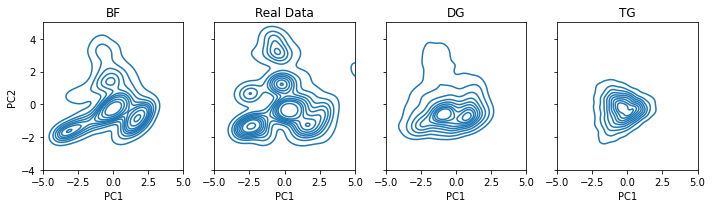

In [29]:
fig, ax = plt.subplots(1,4, figsize=(10,3), sharex=True, sharey=True)
ax[0].set_ylim([-4,5])
ax[0].set_xlim([-5,5])
ax[1].set_ylim([-4,5])
ax[1].set_xlim([-5,5])
ax[2].set_ylim([-4,5])
ax[2].set_xlim([-5,5])
ax[3].set_ylim([-4,5])
ax[3].set_xlim([-5,5])

sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="gen"], x="PC1", y="PC2",ax=ax[0])
ax[0].set_title("BF")
sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="real"], x="PC1", y="PC2",ax=ax[1])
ax[1].set_title("Real Data")
sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="fgen"], x="PC1", y="PC2",ax=ax[2])
ax[2].set_title("DG")
sns.kdeplot(data=pcs_scaled[pcs_scaled["src"]=="tg"], x="PC1", y="PC2",ax=ax[3])
ax[3].set_title("TG")
plt.tight_layout()

# Cash flow

In [30]:
for df in [bf_df, tg_df, dg_df]:

    df["month"] = df["datetime"].dt.month
    df["day"]   = df["datetime"].dt.day
    df["dow"]  =  df["datetime"].dt.dayofweek
    df["year"]  = df["datetime"].dt.year

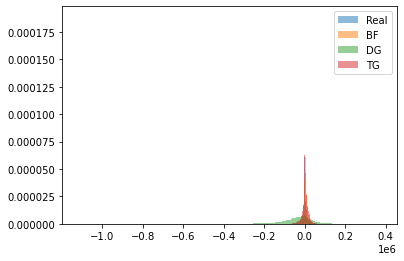

In [33]:
gbr = real_df[["account_id", "month", "raw_amount", "year"]].groupby(["account_id", "month", "year"],as_index=False)["raw_amount"].sum()
gbg = bf_df[["account_id", "month", "raw_amount", "year"]].groupby(["account_id", "month", "year"],as_index=False)["raw_amount"].sum()
gbfg = dg_df[["account_id", "month", "raw_amount", "year"]].groupby(["account_id", "month", "year"],as_index=False)["raw_amount"].sum()
gbtg = tg_df[["account_id", "month", "raw_amount", "year"]].groupby(["account_id", "month", "year"],as_index=False)["raw_amount"].sum()

##### fig

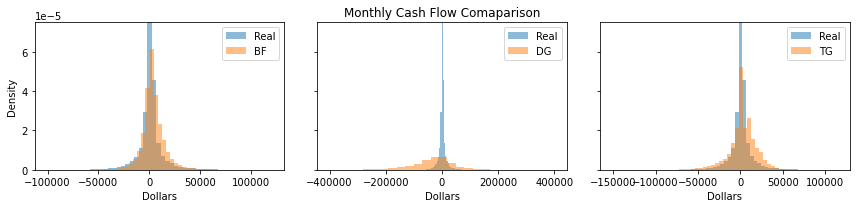

In [35]:
from scipy.stats import wasserstein_distance

fig, ax = plt.subplots(1,3, figsize=(12,3), sharey=True)


for i, (vals, lbl) in enumerate([(gbg, "BF"), (gbfg, "DG"), (gbtg, "TG")]):
    
    
    ax[i].hist(gbr.raw_amount, bins=50, label="Real", density=True, alpha=0.5)
    ax[i].hist(vals.raw_amount, bins=50, label=lbl, density=True, alpha=0.5)
    ax[i].set_ylim([0.0, 0.000075])
    
    if i==1:
        ax[i].set_xlim([-10e5/2.25, 10e5/2.25])
        
    ax[i].legend()
    
    wd = wasserstein_distance(gbr.raw_amount, vals.raw_amount)
    # print("Wasserstein between real and", lbl, "is", wd)
    
ax[1].set_title("Monthly Cash Flow Comaparison")

ax[0].set_ylabel("Density")

ax[0].set_xlabel("Dollars")
ax[1].set_xlabel("Dollars")
ax[2].set_xlabel("Dollars")
    

plt.tight_layout()
plt.show()

# Univariate

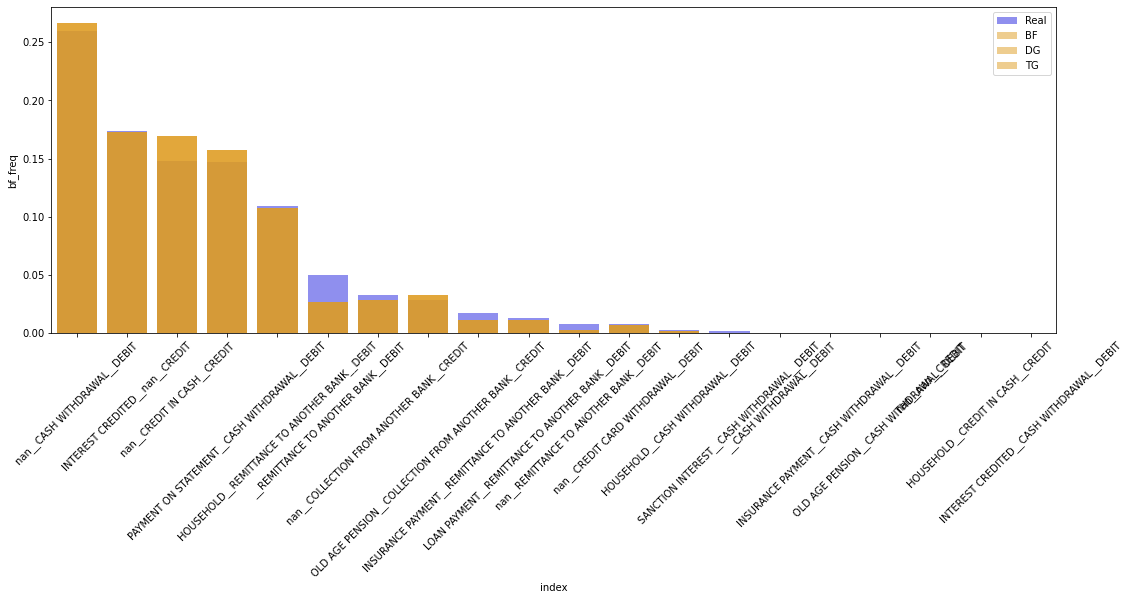

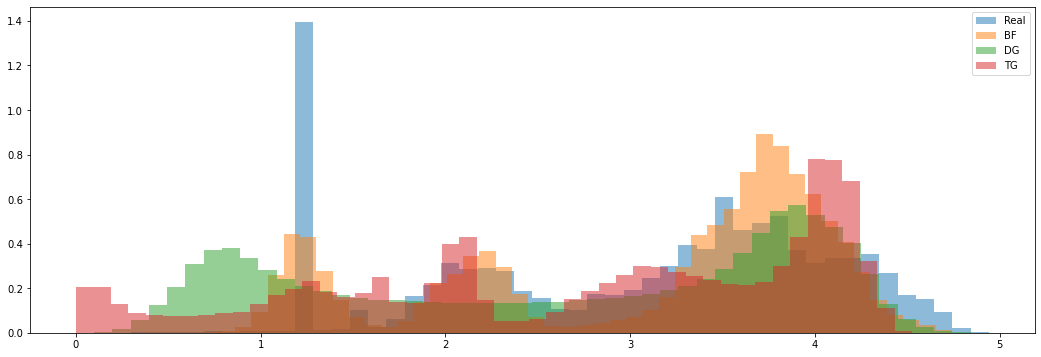

In [36]:
nshow = 20
real_vcs = real_df["tcode"].value_counts()


bf_vcs = bf_df["tcode"].value_counts()

dg_vcs = dg_df["tcode"].value_counts()

tg_vcs = tg_df["tcode"].value_counts()

tcode_counts = pd.merge(real_vcs.reset_index(), 
                        bf_vcs.reset_index(), on='index', how="outer", suffixes=("_real", "_gen")).fillna(0)

tcode_counts = pd.merge(tcode_counts.reset_index(), 
                        dg_vcs.reset_index(), on='index', how="outer", suffixes=("", "_fgen")).fillna(0)
tcode_counts.rename(columns={"tcode":"tcode_fgen"}, inplace=True)

tcode_counts = pd.merge(tcode_counts.drop(columns=['level_0']).reset_index(), 
                        tg_vcs.reset_index(), on='index', how="outer", suffixes=("", "_tg")).fillna(0)
tcode_counts.rename(columns={"tcode":"tcode_tg"}, inplace=True)




tcode_counts["real_freq"] = tcode_counts["tcode_real"] / sum(tcode_counts["tcode_real"])
tcode_counts["bf_freq"] = tcode_counts["tcode_gen"] / sum(tcode_counts["tcode_gen"])
tcode_counts["dg_freq"] = tcode_counts["tcode_fgen"] / sum(tcode_counts["tcode_fgen"])
tcode_counts["tg_freq"]   = tcode_counts["tcode_tg"] / sum(tcode_counts["tcode_tg"])


plt.figure(figsize=(18, 6))
fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="real_freq", x="index", color="b", alpha=0.5, label="Real") 
fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="bf_freq", x="index", color="orange", alpha=0.5, label="BF")
fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="bf_freq", x="index", color="orange", alpha=0.5, label="DG")
fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="bf_freq", x="index", color="orange", alpha=0.5, label="TG")

for item in fig.get_xticklabels():
  item.set_rotation(45)


plt.legend()

plt.show()   


ax, fig = plt.subplots(1,1, figsize=(18, 6))
plt.hist(np.log10(real_df["amount"]+1), bins=50, alpha=0.5, label="Real", density=True)
plt.hist(np.log10(bf_df["amount"].abs()+1), bins=50, alpha=0.5, label="BF", density=True)
plt.hist(np.log10(dg_df["amount"].abs()+1), bins=50, alpha=0.5, label="DG", density=True)
plt.hist(np.log10(tg_df["amount"].abs()+1), bins=50, alpha=0.5, label="TG", density=True)
plt.legend()

plt.show()   

print("\n"*3)

### Figure

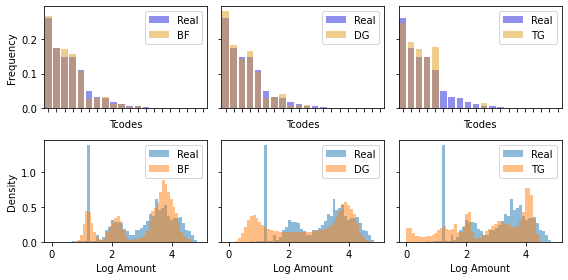

In [39]:
fig, ax = plt.subplots(2,3, figsize=(8,4), sharey="row", sharex="row")



fig.subplots_adjust(hspace=.15) # height spaces
fig.subplots_adjust(wspace=.01) # width spaces



###   Top row (tcodes)   ###
fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="real_freq", x="index", color="b", alpha=0.5, label="Real", ax=ax[0,0]) 
fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="bf_freq", x="index", color="orange", alpha=0.5, label="BF", ax=ax[0,0])
fig.set_xticklabels(["" for _ in range(len(tcode_counts.iloc[:nshow]))])
fig.legend()
fig.set_xlabel("Tcodes")
fig.set_ylabel("Frequency")


fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="real_freq", x="index", color="b", alpha=0.5, label="Real", ax=ax[0,1]) 
fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="dg_freq", x="index", color="orange", alpha=0.5, label="DG", ax=ax[0,1])
fig.set_xticklabels(["" for _ in range(len(tcode_counts.iloc[:nshow]))])
fig.legend()
fig.set_xlabel("Tcodes")
fig.set_ylabel("")


fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="real_freq", x="index", color="b", alpha=0.5, label="Real", ax=ax[0,2]) 
fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="tg_freq", x="index", color="orange", alpha=0.5, label="TG", ax=ax[0,2])
fig.set_xticklabels(["" for _ in range(len(tcode_counts.iloc[:nshow]))])
fig.legend()
fig.set_xlabel("Tcodes")
fig.set_ylabel("")





    
###   Bottom row (amounts)   ###


# ax, fig = plt.subplots(1,1, figsize=(18, 6))
ax[1, 0].hist(np.log10(real_df["amount"]+1), bins=50, alpha=0.5, label="Real", density=True )
ax[1, 0].hist(np.log10(bf_df["amount"].abs()+1), bins=50, alpha=0.5, label="BF", density=True)
ax[1, 0].set_xlabel("Log Amount")
ax[1, 0].set_ylabel("Density")
ax[1, 0].legend()

ax[1, 1].hist(np.log10(real_df["amount"]+1), bins=50, alpha=0.5, label="Real", density=True )
ax[1, 1].hist(np.log10(dg_df["amount"].abs()+1), bins=50, alpha=0.5, label="DG", density=True)
ax[1, 1].set_xlabel("Log Amount")
ax[1, 1].legend()
# ax[1, 1].set_ylabel("Density")


ax[1, 2].hist(np.log10(real_df["amount"]+1), bins=50, alpha=0.5, label="Real", density=True )
ax[1, 2].hist(np.log10(tg_df["amount"].abs()+1), bins=50, alpha=0.5, label="TG", density=True)
ax[1, 2].set_xlabel("Log Amount")
ax[1, 2].legend()


plt.tight_layout()
plt.show()  

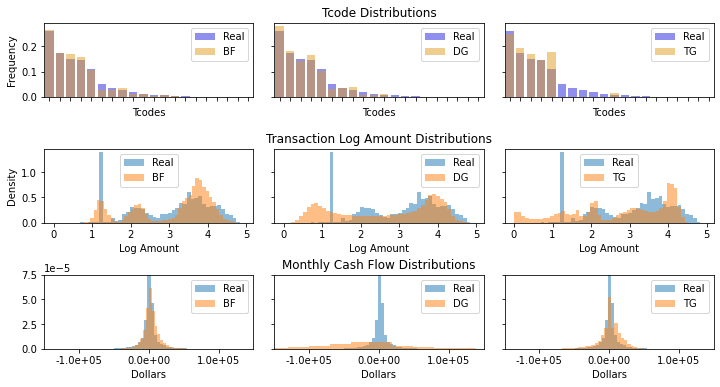

In [41]:
import matplotlib.ticker as mtick

fig, ax = plt.subplots(3,3, figsize=(12,6), sharey="row", sharex="row")



fig.subplots_adjust(hspace=.7) # height spaces
fig.subplots_adjust(wspace=.1) # width spaces



###   Top row (tcodes)   ###
fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="real_freq", x="index", color="b", alpha=0.5, label="Real", ax=ax[0,0]) 
fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="bf_freq", x="index", color="orange", alpha=0.5, label="BF", ax=ax[0,0])
fig.set_xticklabels(["" for _ in range(len(tcode_counts.iloc[:nshow]))])
fig.legend()
fig.set_xlabel("Tcodes")
fig.set_ylabel("Frequency")


fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="real_freq", x="index", color="b", alpha=0.5, label="Real", ax=ax[0,1]) 
fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="dg_freq", x="index", color="orange", alpha=0.5, label="DG", ax=ax[0,1])
fig.set_xticklabels(["" for _ in range(len(tcode_counts.iloc[:nshow]))])
fig.legend()
fig.set_xlabel("Tcodes")
fig.set_ylabel("")


fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="real_freq", x="index", color="b", alpha=0.5, label="Real", ax=ax[0,2]) 
fig = sns.barplot(data = tcode_counts.iloc[:nshow], y="tg_freq", x="index", color="orange", alpha=0.5, label="TG", ax=ax[0,2])
fig.set_xticklabels(["" for _ in range(len(tcode_counts.iloc[:nshow]))])
fig.legend()
fig.set_xlabel("Tcodes")
fig.set_ylabel("")


ax[0, 1].set_title("Tcode Distributions")


# for item in fig.get_xticklabels():
#     item.set_rotation(90)
#     item.set_text("")

 
    
###   Mid row (amounts)   ###


# ax, fig = plt.subplots(1,1, figsize=(18, 6))
ax[1, 0].hist(np.log10(real_df["amount"]+1), bins=50, alpha=0.5, label="Real", density=True )
ax[1, 0].hist(np.log10(bf_df["amount"].abs()+1), bins=50, alpha=0.5, label="BF", density=True)
ax[1, 0].set_xlabel("Log Amount")
ax[1, 0].set_ylabel("Density")
ax[1, 0].legend()

ax[1, 1].hist(np.log10(real_df["amount"]+1), bins=50, alpha=0.5, label="Real", density=True )
ax[1, 1].hist(np.log10(dg_df["amount"].abs()+1), bins=50, alpha=0.5, label="DG", density=True)
ax[1, 1].set_xlabel("Log Amount")
ax[1, 1].legend()
# ax[1, 1].set_ylabel("Density")


ax[1, 2].hist(np.log10(real_df["amount"]+1), bins=50, alpha=0.5, label="Real", density=True )
ax[1, 2].hist(np.log10(tg_df["amount"].abs()+1), bins=50, alpha=0.5, label="TG", density=True)
ax[1, 2].set_xlabel("Log Amount")
ax[1, 2].legend()

ax[1, 1].set_title("Transaction Log Amount Distributions")


#### Bottom Row (cash flow)  ####


for i, (vals, lbl) in enumerate([(gbg, "BF"), (gbfg, "DG"), (gbtg, "TG")]):
    
    
    ax[2, i].hist(gbr.raw_amount, bins=50, label="Real", density=True, alpha=0.5)
    ax[2, i].hist(vals.raw_amount, bins=50, label=lbl, density=True, alpha=0.5)
    ax[2, i].set_ylim([0.0, 0.000075])
    ax[2, i].set_xlim([-10e4*1.5, 10e4*1.5])
    ax[2, i].set_xlabel("Dollars")
    ax[2, i].legend()
    
    # wd = wasserstein_distance(gbr.raw_amount, vals.raw_amount)
    # print("Wasserstein between real and", lbl, "is", wd)
    
ax[2, 1].set_title("Monthly Cash Flow Distributions")


ax[2, 1].xaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))

ax[2, 1].xaxis.set_major_locator(plt.MaxNLocator(3))

# plt.tight_layout()
plt.show()  

# Joint

### Figure

In [57]:
tcode_counts

,level_0,index,tcode_real,tcode_gen,tcode_fgen,tcode_tg,real_freq,gen_freq,fgen_freq,tg_freq
0,0.0,nan__CASH WITHDRAWAL__DEBIT,274059.0,106767.0,266606.0,98995.0,0.259447,0.266917,0.280205,0.247487
1,1.0,INTEREST CREDITED__nan__CREDIT,183114.0,69294.0,174319.0,76696.0,0.173351,0.173235,0.183211,0.191740
2,2.0,nan__CREDIT IN CASH__CREDIT,156743.0,67901.0,134649.0,68211.0,0.148386,0.169753,0.141517,0.170527
3,3.0,PAYMENT ON STATEMENT__CASH WITHDRAWAL__DEBIT,155832.0,62817.0,155934.0,58886.0,0.147523,0.157043,0.163888,0.147215
4,4.0,HOUSEHOLD__REMITTANCE TO ANOTHER BANK__DEBIT,115254.0,43058.0,98814.0,71077.0,0.109109,0.107645,0.103854,0.177693
...,...,...,...,...,...,...,...,...,...,...
61,0.0,PAYMENT ON STATEMENT__REMITTANCE TO ANOTHER BA...,0.0,0.0,0.0,36.0,0.000000,0.000000,0.000000,0.000090
62,0.0,INTEREST CREDITED__nan__DEBIT,0.0,0.0,0.0,28.0,0.000000,0.000000,0.000000,0.000070
63,0.0,INTEREST CREDITED__CREDIT CARD WITHDRAWAL__DEBIT,0.0,0.0,0.0,2.0,0.000000,0.000000,0.000000,0.000005
64,0.0,LOAN PAYMENT__REMITTANCE TO ANOTHER BANK__CREDIT,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000003


###### new fig

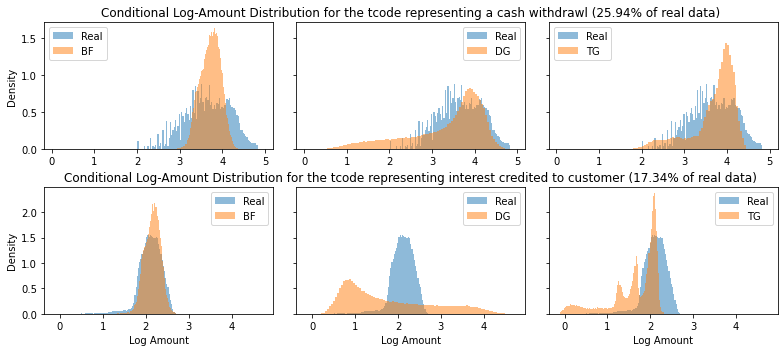

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

In [43]:
fig, ax = plt.subplots(2,3 , figsize=(11,5), sharey='row', sharex="row")

    # "Day of the Month frequencies for the tcode representing interest credited to the customer",
# interest credited to the customer
titles = [
    "Conditional Log-Amount Distribution for the tcode representing a cash withdrawl",
    # "Conditional Log-Amount Distribution for the tcode representing an interest payment"
    "Conditional Log-Amount Distribution for the tcode representing interest credited to customer"
]


for i, (ii, tcode, count_r, count_g, count_f, count_t, real_freq, bf_freq, dg_freq, tg_freq) in tcode_counts.iterrows():
    # print(tcode, i)
    plt.figure(figsize=(18,6))
    
    
    percent_of_data = len(real_df[real_df["tcode"]==tcode])/len(real_df)*100
    
    
    title = f"{titles[i]} ({percent_of_data:.2f}% of real data)"
    # title = f"Amount distribution of real transaction with tcode = {tcode} ({percent_of_data:.2f}% of real data)"
    # print(title)
    

    vals_r = np.log10(real_df[real_df["tcode"]==tcode]["amount"]+1)
    vals_g = np.log10(bf_df[bf_df["tcode"]==tcode]["amount"]+1)
    vals_f = np.log10(dg_df[dg_df["tcode"]==tcode]["amount"]+1)
    vals_t = np.log10(tg_df[tg_df["tcode"]==tcode]["amount"]+1)
    
    # tcode= tcode.split("--")[0]

    ax[i, 0].hist(vals_r, bins=100, label="Real", alpha=0.5, density=True)
    ax[i, 0].hist(vals_g, bins=100, label="BF", alpha=0.5, density=True)
    ax[i, 0].legend()
    
    
#     ai, x i].set_title(tcode)
#     ai, x i].set_title(f'{tcode} ({count_r*100 /len(real_df):.3f}% r / {count_g*100/len(bf_df):.3f}% g)')

    
    ax[i, 1].hist(vals_r, bins=100, label="Real", alpha=0.5, density=True)
    ax[i, 1].hist(vals_f, bins=100, label="DG", alpha=0.5, density=True)
    ax[i, 1].legend()
    
    
    ax[i, 2].hist(vals_r, bins=100, label="Real", alpha=0.5, density=True)
    ax[i, 2].hist(vals_t, bins=100, label="TG", alpha=0.5, density=True)
    ax[i, 2].legend()
    


    ax[i,1].set_title(title)


    

    if i > 0: break
    # if i > 1: break
      



ax[1, 0].set_xlabel("Log Amount")
ax[1, 1].set_xlabel("Log Amount")
ax[1, 2].set_xlabel("Log Amount")

ax[0, 0].set_ylabel("Density")
ax[1, 0].set_ylabel("Density")

# ax[0,1].set_title()

# plt.tight_layout()
fig.tight_layout(h_pad=0.5, w_pad=2)

plt.show()

nan__CASH WITHDRAWAL__DEBIT 0
INTEREST CREDITED__nan__CREDIT 1


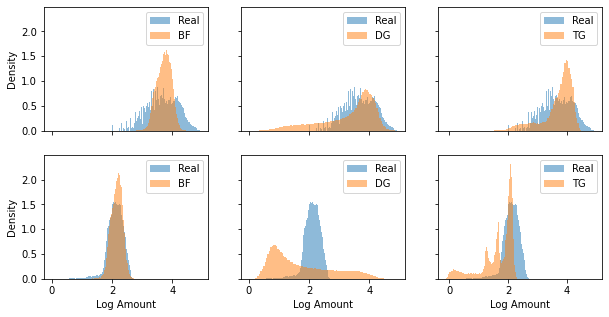

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

In [131]:
fig, ax = plt.subplots(2,3 , figsize=(10,5), sharey=True, sharex="col")


for i, (ii, tcode, count_r, count_g, count_f, count_t, real_freq, bf_freq, dg_freq, tg_freq) in tcode_counts.iterrows():
    print(tcode, i)
    plt.figure(figsize=(18,6))
    

    vals_r = np.log10(real_df[real_df["tcode"]==tcode]["amount"]+1)
    vals_g = np.log10(bf_df[bf_df["tcode"]==tcode]["amount"]+1)
    vals_f = np.log10(dg_df[dg_df["tcode"]==tcode]["amount"]+1)
    vals_t = np.log10(tg_df[tg_df["tcode"]==tcode]["amount"]+1)
    
    # tcode= tcode.split("--")[0]

    ax[i, 0].hist(vals_r, bins=100, label="Real", alpha=0.5, density=True)
    ax[i, 0].hist(vals_g, bins=100, label="BF", alpha=0.5, density=True)
    ax[i, 0].legend()
    
    
#     ai, x i].set_title(tcode)
#     ai, x i].set_title(f'{tcode} ({count_r*100 /len(real_df):.3f}% r / {count_g*100/len(bf_df):.3f}% g)')

    
    ax[i, 1].hist(vals_r, bins=100, label="Real", alpha=0.5, density=True)
    ax[i, 1].hist(vals_f, bins=100, label="DG", alpha=0.5, density=True)
    ax[i, 1].legend()
    
    
    ax[i, 2].hist(vals_r, bins=100, label="Real", alpha=0.5, density=True)
    ax[i, 2].hist(vals_t, bins=100, label="TG", alpha=0.5, density=True)
    ax[i, 2].legend()
    
#     ax[1, i].set_title(tcode)
    
#     ax[1, i].set_title(f'{tcode} ({count_r*100 /len(real_df):.3f}% r / {count_g*100/len(bf_df):.3f}% g)')


    if i > 0: break
    # if i > 1: break
      



ax[1, 0].set_xlabel("Log Amount")
ax[1, 1].set_xlabel("Log Amount")
ax[1, 2].set_xlabel("Log Amount")

ax[0, 0].set_ylabel("Density")
ax[1, 0].set_ylabel("Density")

plt.tight_layout()

plt.show()

# N-grams  

In [47]:
import nltk
from nltk.util import ngrams

In [48]:
def create_ngramcount_df(df, n):
    gb = df.sort_values(by=["account_id", "datetime"]).groupby("account_id", sort=False)["tcode"]
    ngram_list = gb.apply(lambda x: list(ngrams(x, n=n)))

    counts = {}
    for ngram_seq in ngram_list:
        for ngram in ngram_seq:
            ngram = str(ngram)[1:-1]
            counts[ngram] = counts.get(ngram, 0) + 1
            
            
    df = pd.DataFrame.from_dict(counts, orient="index", columns=["counts"]).sort_values("counts", ascending=False)
    df["freqs"] = df["counts"] / sum(df["counts"])

    df.reset_index(inplace=True)
            
    return df

In [53]:
from scipy.spatial import distance

def jensenshannon_diverg(p,q):
    return distance.jensenshannon(p,q, base=2) ** 2

In [49]:
dg_df["datetime"] = pd.to_datetime(dg_df.date)

### Set N  

In [50]:
n = 3
real_ngrams = create_ngramcount_df(real_df, n)
bf_ngrams = create_ngramcount_df(bf_df, n)
dg_ngrams = create_ngramcount_df(dg_df, n)
tg_ngrams = create_ngramcount_df(tg_df, n)

In [51]:
combo_df = pd.merge(real_ngrams, bf_ngrams, on="index", how="outer", suffixes=("_real", "_gen")).fillna(0.0)

combo_df =  pd.merge(combo_df, dg_ngrams, on="index", how="outer").fillna(0.0).rename(columns={
"counts":"counts_fgen", "freqs":"freqs_fgen"
})

combo_df =  pd.merge(combo_df, tg_ngrams, on="index", how="outer").fillna(0.0).rename(columns={
"counts":"counts_tg", "freqs":"freqs_tg", "index":"ngram"
})
# , "index":"ngram"
combo_df

,ngram,counts_real,freqs_real,counts_gen,freqs_gen,counts_fgen,freqs_fgen,counts_tg,freqs_tg
0,"'nan__CASH WITHDRAWAL__DEBIT', 'INTEREST CREDI...",44332.0,0.042329,11230.0,0.028795,34904.0,0.037035,4445.0,0.011397
1,"'nan__CASH WITHDRAWAL__DEBIT', 'PAYMENT ON STA...",40465.0,0.038637,11663.0,0.029905,28014.0,0.029724,2950.0,0.007564
2,"'nan__CASH WITHDRAWAL__DEBIT', 'nan__CASH WITH...",29876.0,0.028526,5727.0,0.014685,50951.0,0.054061,7462.0,0.019133
3,"'INTEREST CREDITED__nan__CREDIT', 'PAYMENT ON ...",25998.0,0.024823,13671.0,0.035054,12664.0,0.013437,3530.0,0.009051
4,'PAYMENT ON STATEMENT__CASH WITHDRAWAL__DEBIT'...,21789.0,0.020805,15185.0,0.038936,9797.0,0.010395,2127.0,0.005454
...,...,...,...,...,...,...,...,...,...
5277,"'OLD AGE PENSION__CASH WITHDRAWAL__DEBIT', 'OL...",0.0,0.000000,0.0,0.000000,0.0,0.000000,1.0,0.000003
5278,'OLD AGE PENSION__COLLECTION FROM ANOTHER BANK...,0.0,0.000000,0.0,0.000000,0.0,0.000000,1.0,0.000003
5279,"'nan__CASH WITHDRAWAL__DEBIT', 'PAYMENT ON STA...",0.0,0.000000,0.0,0.000000,0.0,0.000000,1.0,0.000003
5280,"'nan__REMITTANCE TO ANOTHER BANK__DEBIT', 'nan...",0.0,0.000000,0.0,0.000000,0.0,0.000000,1.0,0.000003


In [54]:
jensenshannon_diverg(combo_df["freqs_real"], combo_df["freqs_gen"])

0.06121853387545432

In [55]:
jensenshannon_diverg(combo_df["freqs_real"], combo_df["freqs_fgen"])

0.1899731940381736

### Figure

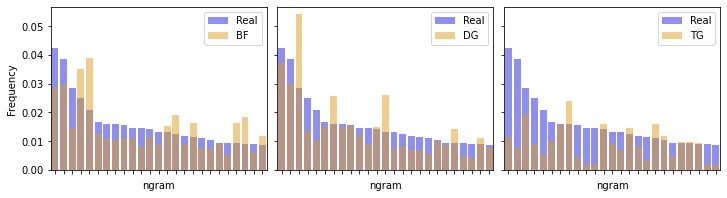

In [275]:

# plt.figure
fig, ax = plt.subplots(1, 3, figsize=(12,3), sharey=True)

barplt = sns.barplot(data = combo_df.iloc[:25],x="ngram", y="freqs_real", color="b", alpha=0.5, label="Real", ax=ax[0])
barplt = sns.barplot(data = combo_df.iloc[:25],x="ngram", y="freqs_gen", color="orange", alpha=0.5, label="BF", ax=ax[0])


barplt.set_xticklabels(["" for _ in barplt.get_xticklabels()])
barplt.legend()
barplt.set_ylabel("Frequency")


barplt = sns.barplot(data = combo_df.iloc[:25],x="ngram", y="freqs_real", color="b", alpha=0.5, label="Real", ax=ax[1])
barplt = sns.barplot(data = combo_df.iloc[:25],x="ngram", y="freqs_fgen", color="orange", alpha=0.5, label="DG", ax=ax[1])

barplt.set_xticklabels(["" for _ in barplt.get_xticklabels()])
barplt.legend()
barplt.set_ylabel("")



barplt = sns.barplot(data = combo_df.iloc[:25],x="ngram", y="freqs_real", color="b", alpha=0.5, label="Real", ax=ax[2])
barplt = sns.barplot(data = combo_df.iloc[:25],x="ngram", y="freqs_tg", color="orange", alpha=0.5, label="TG", ax=ax[2])

barplt.set_xticklabels(["" for _ in barplt.get_xticklabels()])
barplt.legend()
barplt.set_ylabel("")



# plt.title("Distributions of top 30 3-grams (tcodes)")    
plt.legend()
# plt.tight_layout()
fig.subplots_adjust(wspace=.05) 
plt.show()

# Dates

In [57]:
""" PAYMENT ON STATEMENT__CASH WITHDRAWAL__DEBIT 14.75%
    __REMITTANCE TO ANOTHER BANK__DEBIT 5.00% """

use_codes = ['PAYMENT ON STATEMENT__CASH WITHDRAWAL__DEBIT', ' __REMITTANCE TO ANOTHER BANK__DEBIT']

### paper fig

Days of real transaction with tcode = INTEREST CREDITED__nan__CREDIT 17.34% of real data
Days of real transaction with tcode = HOUSEHOLD__REMITTANCE TO ANOTHER BANK__DEBIT 10.91% of real data


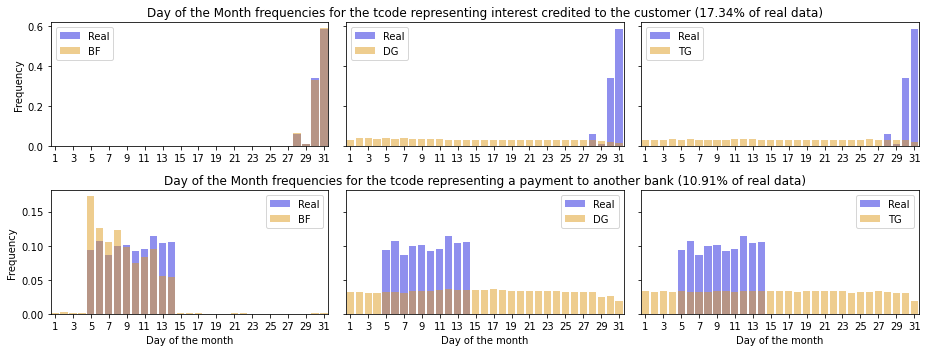

In [58]:
field1 = 'tcode'
field2 = 'day'
plot_sort_by = "counts_real"
plot_n = 32

to_plot = ['INTEREST CREDITED__nan__CREDIT', 'HOUSEHOLD__REMITTANCE TO ANOTHER BANK__DEBIT']
titles = ['Debit from another bank']

titles = [
    # "Day of the Month frequencies for the tcode representing an interest payment",
    "Day of the Month frequencies for the tcode representing interest credited to the customer",
    "Day of the Month frequencies for the tcode representing a payment to another bank",
]

fig, ax = plt.subplots(2,3, figsize = (13, 5), sharey='row', sharex='row')




combo_df1 = pd.merge(real_df[field1].value_counts().reset_index(), 
                    bf_df[field1].value_counts().reset_index(), 
                    on="index", how="outer", suffixes=("_real", "_gen")).fillna(0.0)

combo_df2 = pd.merge(dg_df[field1].value_counts().reset_index(), 
                    tg_df[field1].value_counts().reset_index(), 
                    on="index", how="outer", suffixes=("_dg", "_tg")).fillna(0.0)


combo_df_overall = pd.merge(combo_df1, 
                    combo_df2, 
                    on="index", how="outer", suffixes=("XXX", "YYY")
                   ).fillna(0.0).sort_values(by=f"{field1}_real", ascending=False)


f1_opts = to_plot # combo_df_overall["index"]


for row_i, code_1 in enumerate(f1_opts):
    
    combo_df1 = pd.merge(real_df[real_df[field1]==code_1][field2].value_counts().reset_index(), 
                        bf_df[bf_df[field1]==code_1][field2].value_counts().reset_index(), 
                        on="index", how="outer", suffixes=("_real", "_gen")).fillna(0.0)

    combo_df2 = pd.merge(dg_df[dg_df[field1]==code_1][field2].value_counts().reset_index(), 
                        tg_df[tg_df[field1]==code_1][field2].value_counts().reset_index(), 
                        on="index", how="outer", suffixes=("_dg", "_tg")).fillna(0.0)


    combo_df = pd.merge(combo_df1, 
                        combo_df2, 
                        on="index", how="outer", suffixes=("XXX", "YYY")).fillna(0.0)
    
    
    percent_of_data = len(real_df[real_df[field1]==code_1])/len(real_df)*100
    print(f"{field2.capitalize()}s of real transaction with {field1} =", 
                  code_1, f"{percent_of_data:.2f}% of real data")
    
    
    for version in ["real", 'gen', 'dg', 'tg']:

        combo_df.rename(columns={f"{field2}_{version}": f"counts_{version}"}, 
                        inplace=True)

        combo_df[f"ps_{version}"] = combo_df[f"counts_{version}"] / np.sum(combo_df[f"counts_{version}"])


    combo_df = combo_df.rename(columns={"index":field2}
                      ).sort_values(by=plot_sort_by, ascending=False
                      ).fillna(0.0)
    
    



    barplt = sns.barplot(data = combo_df.iloc[:plot_n],x=field2, y="ps_real", color="b", alpha=0.5, label="Real", ax=ax[row_i, 0])
    barplt = sns.barplot(data = combo_df.iloc[:plot_n],x=field2, y="ps_gen", color="orange", alpha=0.5, label="BF", ax=ax[row_i, 0])


    barplt = sns.barplot(data = combo_df.iloc[:plot_n],x=field2, y="ps_real", color="b", alpha=0.5, label="Real",   ax=ax[row_i, 1])
    barplt = sns.barplot(data = combo_df.iloc[:plot_n],x=field2, y="ps_dg", color="orange", alpha=0.5, label="DG", ax=ax[row_i, 1])


    barplt = sns.barplot(data = combo_df.iloc[:plot_n],x=field2, y="ps_real", color="b", alpha=0.5, label="Real",   ax=ax[row_i, 2])
    barplt = sns.barplot(data = combo_df.iloc[:plot_n],x=field2, y="ps_tg", color="orange", alpha=0.5, label="TG", ax=ax[row_i, 2])



    for i in range(3):

        ax[row_i, i].xaxis.set_major_locator(plt.MaxNLocator(16))
        ax[row_i, i].legend()

        ax[0, i].set_xlabel("")
        ax[-1, i].set_xlabel("Day of the month")
        ax[row_i, i].set_ylabel("")
        
    ax[row_i, 0].set_ylabel("Frequency")
        
  

    percent_of_data = len(real_df[real_df[field1]==code_1])/len(real_df)*100
    title = f"{titles[row_i]} ({percent_of_data:.2f}% of real data)"

    # ax[i,1].set_title(title)
    
    ax[row_i, 1].set_title(title)
    # ax[row_i, 1].set_title(f"Day of the month frequencies for '{code_1}' transactions ({percent_of_data:.2f}% of real data)")    


plt.tight_layout()
plt.show()


    

### new

Days of real transaction with tcode = nan__CASH WITHDRAWAL__DEBIT 25.94% of real data
Days of real transaction with tcode = INTEREST CREDITED__nan__CREDIT 17.34% of real data
Days of real transaction with tcode = nan__CREDIT IN CASH__CREDIT 14.84% of real data
Days of real transaction with tcode = PAYMENT ON STATEMENT__CASH WITHDRAWAL__DEBIT 14.75% of real data


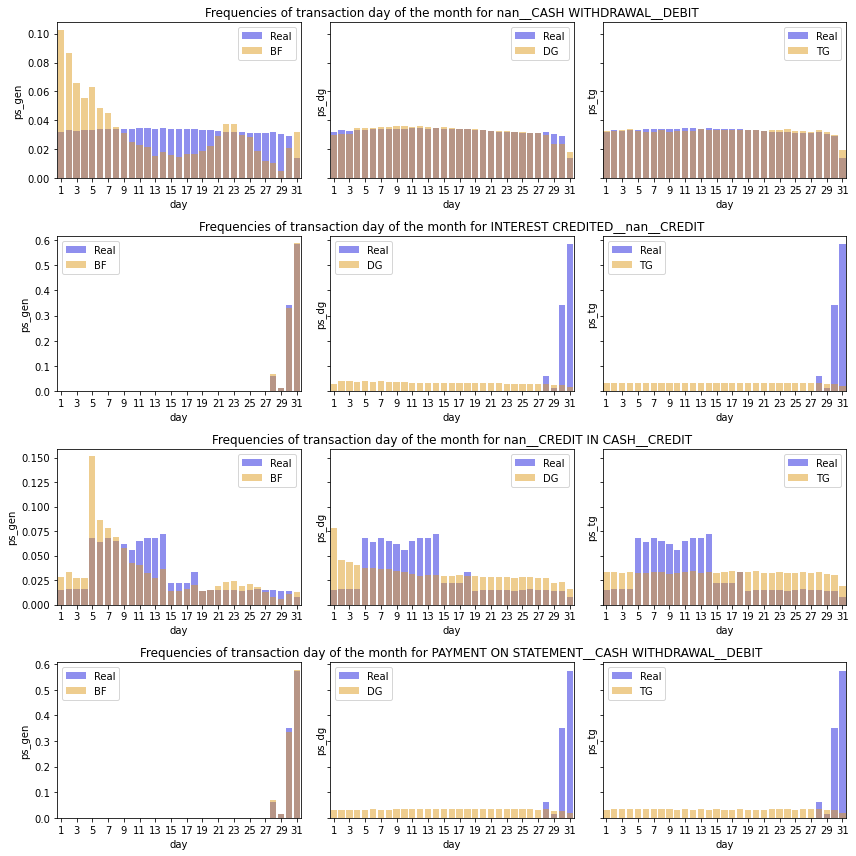

In [95]:
field1 = 'tcode'
field2 = 'day'
plot_sort_by = "counts_real"
plot_n = 32

rows = 4

fig, ax = plt.subplots(rows,3 , figsize=(12, 3 * rows), sharey='row', sharex="row")


f1_opts = set(real_df[field1].unique()).union(set(bf_df[field1].unique()))



# make_barplot(real_df[real_df[field1]==code_1], bf_df[bf_df[field1]==code_1], field=field2, **barplot_params)



combo_df1 = pd.merge(real_df[field1].value_counts().reset_index(), 
                    bf_df[field1].value_counts().reset_index(), 
                    on="index", how="outer", suffixes=("_real", "_gen")).fillna(0.0)

combo_df2 = pd.merge(dg_df[field1].value_counts().reset_index(), 
                    tg_df[field1].value_counts().reset_index(), 
                    on="index", how="outer", suffixes=("_dg", "_tg")).fillna(0.0)


combo_df_overall = pd.merge(combo_df1, 
                    combo_df2, 
                    on="index", how="outer", suffixes=("XXX", "YYY")
                   ).fillna(0.0).sort_values(by=f"{field1}_real", ascending=False)


f1_opts = combo_df_overall["index"]





for i, code_1 in enumerate(f1_opts):
    
    if i == rows:
        break
    
    combo_df1 = pd.merge(real_df[real_df[field1]==code_1][field2].value_counts().reset_index(), 
                        bf_df[bf_df[field1]==code_1][field2].value_counts().reset_index(), 
                        on="index", how="outer", suffixes=("_real", "_gen")).fillna(0.0)

    combo_df2 = pd.merge(dg_df[dg_df[field1]==code_1][field2].value_counts().reset_index(), 
                        tg_df[tg_df[field1]==code_1][field2].value_counts().reset_index(), 
                        on="index", how="outer", suffixes=("_dg", "_tg")).fillna(0.0)


    combo_df = pd.merge(combo_df1, 
                        combo_df2, 
                        on="index", how="outer", suffixes=("XXX", "YYY")).fillna(0.0)
    
    
    
    print(f"{field2.capitalize()}s of real transaction with {field1} =", 
                  code_1, f"{len(real_df[real_df[field1]==code_1])/len(real_df)*100:.2f}% of real data")
    
    
    for version in ["real", 'gen', 'dg', 'tg']:

        combo_df.rename(columns={f"{field2}_{version}": f"counts_{version}"}, 
                        inplace=True)

        combo_df[f"ps_{version}"] = combo_df[f"counts_{version}"] / np.sum(combo_df[f"counts_{version}"])


    combo_df = combo_df.rename(columns={"index":field2}
                      ).sort_values(by=plot_sort_by, ascending=False
                      ).fillna(0.0)
    
    

    # fig, ax = plt.subplots(1,3, figsize = (15, 3))

    barplt = sns.barplot(data = combo_df.iloc[:plot_n],x=field2, y="ps_real", color="b", alpha=0.5, label="Real", ax=ax[i,0])
    barplt = sns.barplot(data = combo_df.iloc[:plot_n],x=field2, y="ps_gen", color="orange", alpha=0.5, label="BF", ax=ax[i,0])


    barplt = sns.barplot(data = combo_df.iloc[:plot_n],x=field2, y="ps_real", color="b", alpha=0.5, label="Real",   ax=ax[i,1])
    barplt = sns.barplot(data = combo_df.iloc[:plot_n],x=field2, y="ps_dg", color="orange", alpha=0.5, label="DG", ax=ax[i,1])


    barplt = sns.barplot(data = combo_df.iloc[:plot_n],x=field2, y="ps_real", color="b", alpha=0.5, label="Real",   ax=ax[i,2])
    barplt = sns.barplot(data = combo_df.iloc[:plot_n],x=field2, y="ps_tg", color="orange", alpha=0.5, label="TG", ax=ax[i,2])



    if i < rows - 1:
        for ii in range(3):

            # ax[i, ii].set_xlabel("")
            
            ax[i, ii].xaxis.set_major_locator(plt.MaxNLocator(16))
            ax[i, ii].legend()
        
        
    # tick_lbls = False
    # if not tick_lbls:
    #     barplt.set_xticklabels(["" for _ in barplt.get_xticklabels()])
    # else:
    #     for item in barplt.get_xticklabels():
    #         item.set_rotation(90)



    # plt.title(f"Frequencies of top {plot_n} {field2}s")    
    ax[i, 1].set_title(f"Frequencies of transaction day of the month for {code_1}")    
    
    
    
for ii in range(3):

    ax[-1, ii].xaxis.set_major_locator(plt.MaxNLocator(16))
    ax[-1, ii].legend()


plt.tight_layout()
plt.show()

Dows of real transaction with tcode = nan__CASH WITHDRAWAL__DEBIT 25.94% of real data
Dows of real transaction with tcode = INTEREST CREDITED__nan__CREDIT 17.34% of real data
Dows of real transaction with tcode = nan__CREDIT IN CASH__CREDIT 14.84% of real data
Dows of real transaction with tcode = PAYMENT ON STATEMENT__CASH WITHDRAWAL__DEBIT 14.75% of real data


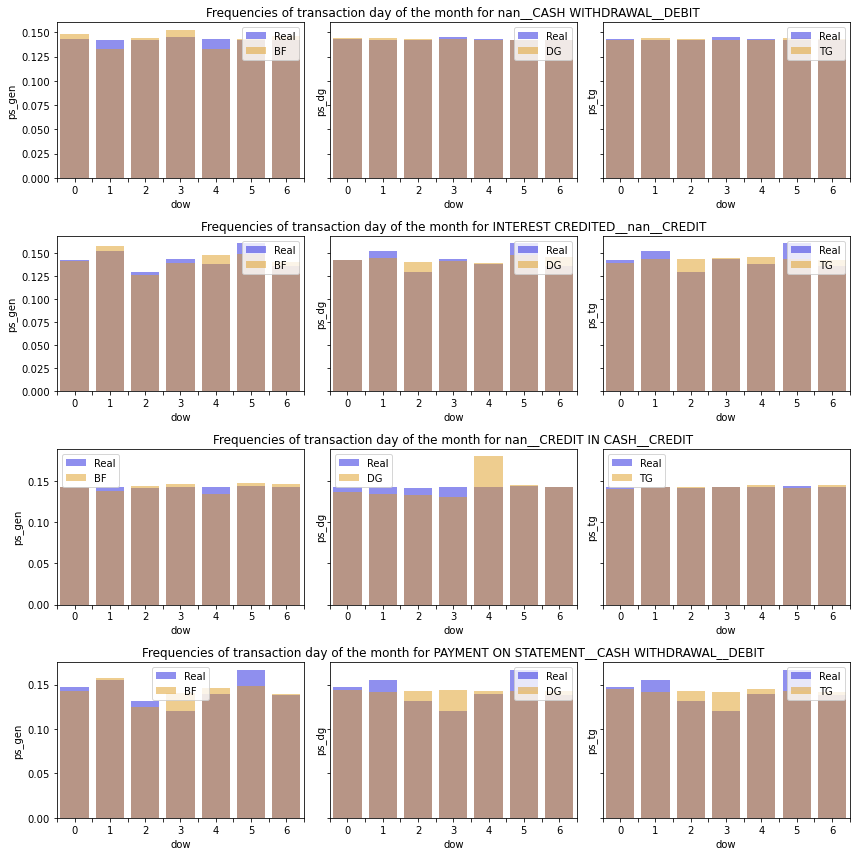

In [96]:
field1 = 'tcode'
field2 = 'dow'
plot_sort_by = "counts_real"
plot_n = 32

rows = 4

fig, ax = plt.subplots(rows,3 , figsize=(12, 3 * rows), sharey='row', sharex="row")


f1_opts = set(real_df[field1].unique()).union(set(bf_df[field1].unique()))



# make_barplot(real_df[real_df[field1]==code_1], bf_df[bf_df[field1]==code_1], field=field2, **barplot_params)



combo_df1 = pd.merge(real_df[field1].value_counts().reset_index(), 
                    bf_df[field1].value_counts().reset_index(), 
                    on="index", how="outer", suffixes=("_real", "_gen")).fillna(0.0)

combo_df2 = pd.merge(dg_df[field1].value_counts().reset_index(), 
                    tg_df[field1].value_counts().reset_index(), 
                    on="index", how="outer", suffixes=("_dg", "_tg")).fillna(0.0)


combo_df_overall = pd.merge(combo_df1, 
                    combo_df2, 
                    on="index", how="outer", suffixes=("XXX", "YYY")
                   ).fillna(0.0).sort_values(by=f"{field1}_real", ascending=False)


f1_opts = combo_df_overall["index"]





for i, code_1 in enumerate(f1_opts):
    
    if i == rows:
        break
    
    combo_df1 = pd.merge(real_df[real_df[field1]==code_1][field2].value_counts().reset_index(), 
                        bf_df[bf_df[field1]==code_1][field2].value_counts().reset_index(), 
                        on="index", how="outer", suffixes=("_real", "_gen")).fillna(0.0)

    combo_df2 = pd.merge(dg_df[dg_df[field1]==code_1][field2].value_counts().reset_index(), 
                        tg_df[tg_df[field1]==code_1][field2].value_counts().reset_index(), 
                        on="index", how="outer", suffixes=("_dg", "_tg")).fillna(0.0)


    combo_df = pd.merge(combo_df1, 
                        combo_df2, 
                        on="index", how="outer", suffixes=("XXX", "YYY")).fillna(0.0)
    
    
    
    print(f"{field2.capitalize()}s of real transaction with {field1} =", 
                  code_1, f"{len(real_df[real_df[field1]==code_1])/len(real_df)*100:.2f}% of real data")
    
    
    for version in ["real", 'gen', 'dg', 'tg']:

        combo_df.rename(columns={f"{field2}_{version}": f"counts_{version}"}, 
                        inplace=True)

        combo_df[f"ps_{version}"] = combo_df[f"counts_{version}"] / np.sum(combo_df[f"counts_{version}"])


    combo_df = combo_df.rename(columns={"index":field2}
                      ).sort_values(by=plot_sort_by, ascending=False
                      ).fillna(0.0)
    
    

    # fig, ax = plt.subplots(1,3, figsize = (15, 3))

    barplt = sns.barplot(data = combo_df.iloc[:plot_n],x=field2, y="ps_real", color="b", alpha=0.5, label="Real", ax=ax[i,0])
    barplt = sns.barplot(data = combo_df.iloc[:plot_n],x=field2, y="ps_gen", color="orange", alpha=0.5, label="BF", ax=ax[i,0])


    barplt = sns.barplot(data = combo_df.iloc[:plot_n],x=field2, y="ps_real", color="b", alpha=0.5, label="Real",   ax=ax[i,1])
    barplt = sns.barplot(data = combo_df.iloc[:plot_n],x=field2, y="ps_dg", color="orange", alpha=0.5, label="DG", ax=ax[i,1])


    barplt = sns.barplot(data = combo_df.iloc[:plot_n],x=field2, y="ps_real", color="b", alpha=0.5, label="Real",   ax=ax[i,2])
    barplt = sns.barplot(data = combo_df.iloc[:plot_n],x=field2, y="ps_tg", color="orange", alpha=0.5, label="TG", ax=ax[i,2])



    if i < rows - 1:
        for ii in range(3):

            # ax[i, ii].set_xlabel("")
            
            ax[i, ii].xaxis.set_major_locator(plt.MaxNLocator(16))
            ax[i, ii].legend()
        
        
    # tick_lbls = False
    # if not tick_lbls:
    #     barplt.set_xticklabels(["" for _ in barplt.get_xticklabels()])
    # else:
    #     for item in barplt.get_xticklabels():
    #         item.set_rotation(90)



    # plt.title(f"Frequencies of top {plot_n} {field2}s")    
    ax[i, 1].set_title(f"Frequencies of transaction day of the month for {code_1}")    
    
    
    
for ii in range(3):

    ax[-1, ii].xaxis.set_major_locator(plt.MaxNLocator(16))
    ax[-1, ii].legend()


plt.tight_layout()
plt.show()